<a href="https://colab.research.google.com/github/ScriptsRemote/SCRIPTSREMOTE/blob/main/Kmeans_Sckitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
##Instalar biblioteca
!pip install rasterio -q

In [18]:
##Importar bibliotecas
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Abrir o arquivo TIF com rasterio
src =rasterio.open('/content/drive/MyDrive/MBA/img_rgb_pratica.tif')
# Ler os dados do raster como um array numpy
data = src.read()
transform = src.transform
crs = src.crs

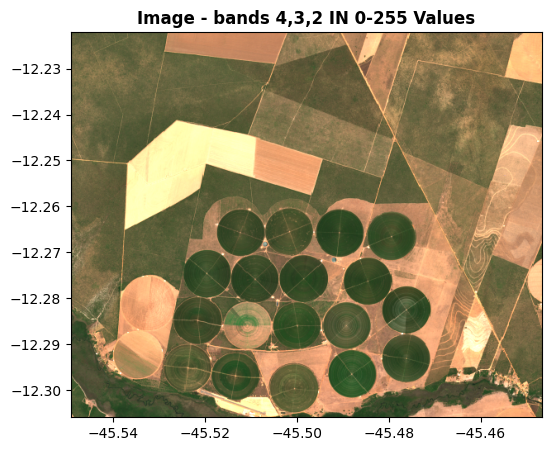

In [20]:
# Criar a figura e os eixos
fig, ax1 = plt.subplots(1,1, figsize=(14, 5))

# Plotar a imagem RGB
show(src.read([4,3,2])*5, transform=src.transform, title='Image - bands 4,3,2 IN 0-255 Values', ax=ax1)

# Mostrar o gráfico
plt.show()

In [21]:
# Transformar os dados do raster em um array 2D
data_2d = data.reshape(data.shape[0], -1).T

In [ ]:
# Normalizar os dados
data_normalized = (data_2d - data_2d.min()) / (data_2d.max() - data_2d.min())

In [ ]:
# Realizar agrupamento K-means com 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_normalized)

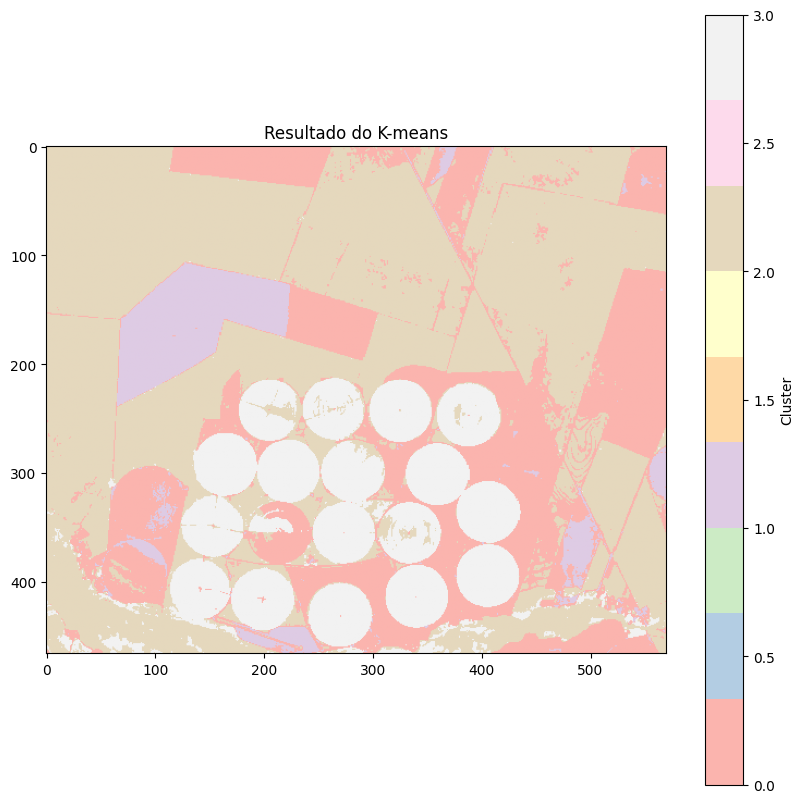

In [22]:
# Atribuir rótulos de cluster a cada pixel
labels = kmeans.labels_

# Reformatar os rótulos para o formato do raster
labels_2d = labels.reshape(data.shape[1], data.shape[2])

# Plotar os clusters com cores diferentes
plt.figure(figsize=(10, 10))
plt.imshow(labels_2d, cmap='Pastel1')
plt.colorbar(label='Cluster')
plt.title('Resultado do K-means')
plt.show()

In [ ]:
# Salvar o resultado como um novo arquivo TIF
output_file = '/content/drive/MyDrive/MBA/resultado_kmeans_teste.tif'

with rasterio.open(output_file, 'w',
                   driver='GTiff',
                   height=labels_2d.shape[0],
                   width=labels_2d.shape[1],
                   count=1,
                   dtype=labels_2d.dtype,
                   crs=crs,
                   transform=transform) as dst:
    dst.write(labels_2d, 1)

print(f'Resultado salvo em {output_file}')

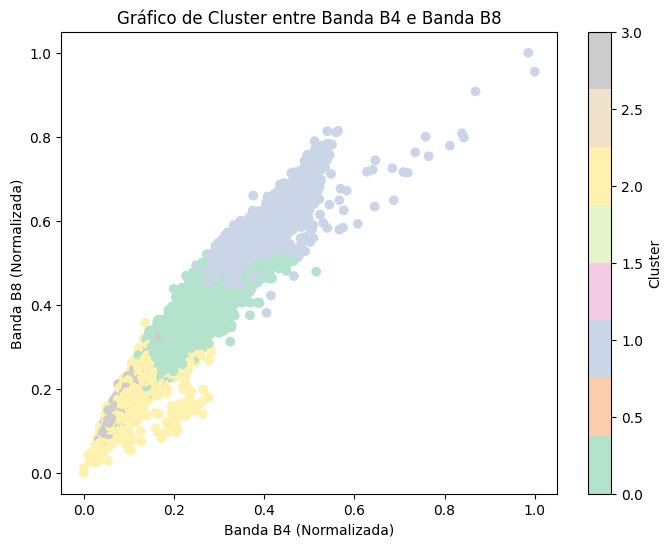

In [23]:
# Ler os dados das bandas B4 e B8
band4 = src.read(3)  # A terceira banda é a B4
band8 = src.read(5)  # A quinta banda é a B8

# Transformar os dados das bandas em arrays 1D
band4_1d = band4.flatten()
band8_1d = band8.flatten()

# Empilhar os arrays das bandas para formar um array 2D
data_2d = np.column_stack((band4_1d, band8_1d))

# Normalizar os dados
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_2d)

# Plotar o gráfico de cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=labels, cmap='Pastel2')
plt.xlabel('Banda B4 (Normalizada)')
plt.ylabel('Banda B8 (Normalizada)')
plt.colorbar(label='Cluster')
plt.title('Gráfico de Cluster entre Banda B4 e Banda B8')
plt.show()

In [25]:
##Abrir nossa imagem
##Precisaremos conectar nosso drive
filename = "/content/drive/MyDrive/MBA/resultado_kmeans_teste.tif"
raster = rasterio.open(filename)
##Verificando os metadados
raster.meta

{'driver': 'GTiff',
 'dtype': 'int32',
 'nodata': None,
 'width': 570,
 'height': 466,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'),
 'transform': Affine(0.0001796630568239043, 0.0, -45.54907648128034,
        0.0, -0.0001796630568239043, -12.222118429616561)}

In [26]:
##Obter os dados do raster e as informações de sua extensão:
data = raster.read(1)
extent = raster.bounds

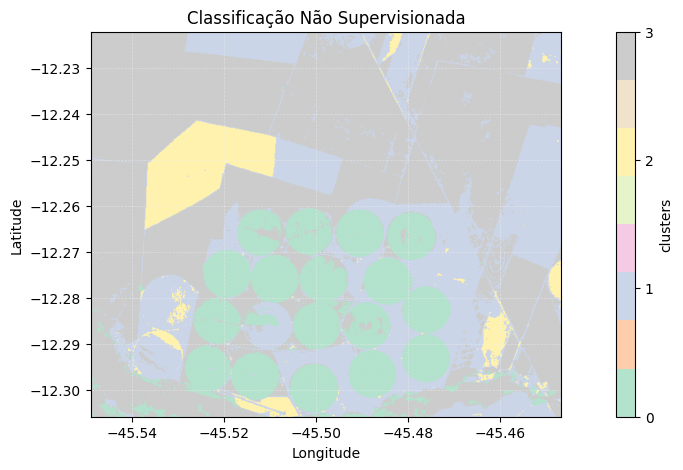

In [27]:
# Plotar o gráfico
fig, ax = plt.subplots(1,1, figsize=(14,5))

# Plotar o raster com o rasterio.show() e integração com o plt
img = plt.imshow(data, cmap="Pastel2")  # Criar imagem vazia para a barra de legenda
plt.colorbar(img,ticks=[0, 1, 2, 3], label="clusters")  # Usar a imagem vazia como argumento
##Por fim o raster
show(raster, ax=ax, transform=raster.transform, cmap="Pastel2")

# Personalizar rótulos e título do gráfico
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Classificação Não Supervisionada")

##Inserindo grids
ax.grid(color='0.95', linestyle='dashed', linewidth=0.5, alpha=0.5)

##Salvando a figura como jpeg
plt.savefig('Mapa de Classificação.jpg',dpi=300)

# Mostrar o gráfico na tela
plt.show()

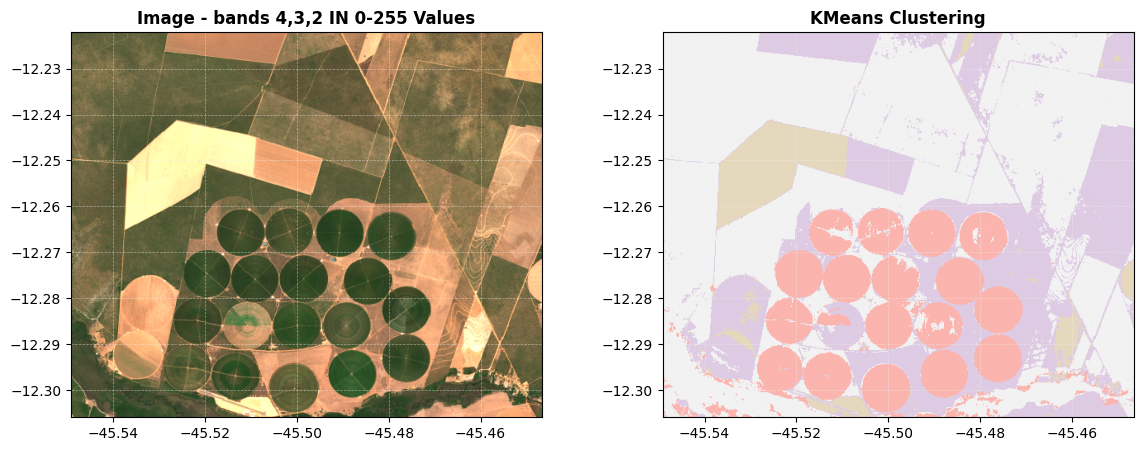

In [28]:
# imprima em uma linha e 2 colunas
import matplotlib.pyplot as plt
# Criar a figura e os eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotar a imagem RGB
show(src.read([4,3,2])*5, transform=src.transform, title='Image - bands 4,3,2 IN 0-255 Values', ax=ax1)

# Plotar a imagem KMeans
show(raster, ax=ax2, transform=raster.transform, cmap="Pastel1", title='KMeans Clustering')

# Adicionar grids
ax1.grid(color='0.95', linestyle='dashed', linewidth=0.5, alpha=0.5)
ax2.grid(color='0.95', linestyle='dashed', linewidth=0.5, alpha=0.5)

# Mostrar o gráfico
plt.show()
